# Introduction

Vaccines are a cornerstone of public health, providing both individual protection and broader community benefits through 'herd immunity,' which limits the spread of infectious diseases. The importance of vaccination has been underscored by pandemics, including the COVID-19 crisis that has captured global attention like few others.
<br>One such example is the 2009 H1N1 influenza pandemic, commonly known as 'swine flu.' First identified in the spring of 2009, the H1N1 virus rapidly spread worldwide. By October 2009, the United States government launched a vaccination campaign, making H1N1 vaccines available to the public.
<br>To monitor vaccination rates during this campaign, the National 2009 H1N1 Flu Survey was conducted. This phone survey collected data on individuals’ vaccination status for H1N1 and seasonal flu, along with details about their behaviors, opinions, and personal circumstances. Analyzing these patterns can provide insights to guide public health efforts in managing future outbreaks.

## Goal 
The goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, predict two probabilities: one for h1n1_vaccine and one for seasonal_vaccine.

## Approach 
This represents a supervised machine learning classification problem with two target variables.Hence we will use classification methods such as Decision trees,Random Forest classfier and XGB classifier with Multioutput classification to predict two target variables.

## Import of Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from xgboost import XGBClassifier

## Reading the Data

Pandas function Usage example  
#### df = pd.read_csv(csv_file_path, sep=';', header=0, index_col='ID', usecols=['ID', 'Name', 'Age'])  
sep: Specifies the delimiter used in the CSV file. The default is a comma (,).  
header: Specifies which row to use as the column names. If set to None, the default column names will be used.  
index_col: Specifies which column to use as the row labels (index).  
usecols: Specifies which columns to read from the file.  


In [2]:
#Reading the csv file 
data1 = pd.read_csv("training_set_features.csv",index_col='respondent_id')
print("Data Statistics:",list(data1.columns.values))
label_df = pd.read_csv("training_set_labels.csv",index_col='respondent_id')
# data1.head()
data_test = pd.read_csv("test_set_features.csv",index_col='respondent_id')

Data Statistics: ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'employment_industry', 'employment_occupation']


In [3]:
data1.head()
data1.shape
data1.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [4]:
label_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


# Exploratory Data Analysis

In [12]:
def plot_categorical_counts(data, columns):
    """
    Plot counts of categorical columns.

    Parameters:
    data (pd.DataFrame): The dataset to visualize.
    columns (list): List of categorical columns to visualize.
    """
    for column in columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=column, data=data, palette='viridis')
        plt.title(f"Count Plot for {column}")
        plt.xticks(rotation=45)
        plt.show()
              
def visualize_distributions(data, columns):
    """
    Visualize the distributions of numerical columns.

    Parameters:
    data (pd.DataFrame): The dataset to visualize.
    columns (list): List of numerical columns to visualize.
    """
    for column in columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[column], kde=True, bins=30, color='blue')
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()
        
def summary_statistics(data):
    """
    Compute and print summary statistics for numerical columns.

    Parameters:
    data (pd.DataFrame): The dataset to analyze.

    Returns:
    pd.DataFrame: Summary statistics.
    """
    summary = data.describe()
    print("\nSummary Statistics:")
    print(summary)
    return summary

def plot_multiple_boxplots(data):
    """
    Plot multiple boxplots for all numerical variables in the dataset.

    Parameters:
    data (pd.DataFrame): The dataset to visualize.
    """
    numerical_columns = data.select_dtypes(include=[np.number]).columns
    if numerical_columns.empty:
        print("No numerical columns found in the dataset.")
        return

    plt.figure(figsize=(15, 8))
    data_melted = data[numerical_columns].melt(var_name='Variable', value_name='Value')
    sns.boxplot(x='Variable', y='Value', data=data_melted, palette='Set3')
    plt.title("Boxplots for All Numerical Variables")
    plt.xticks(rotation=45)
    plt.show()


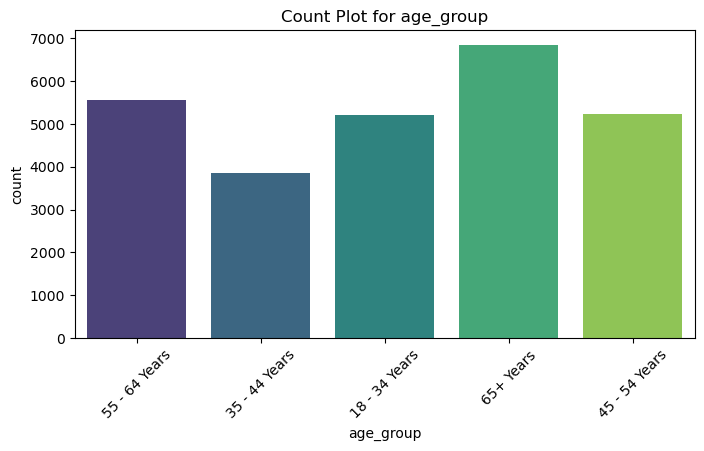

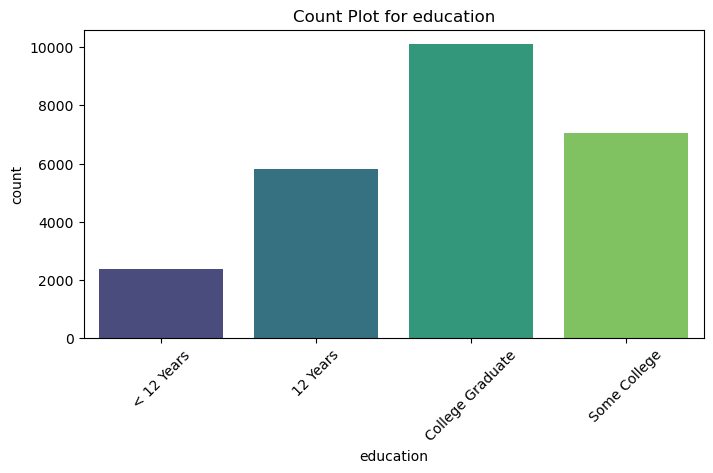

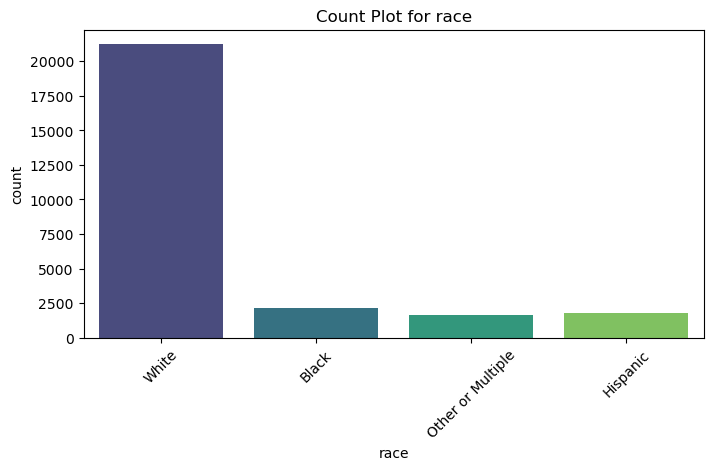

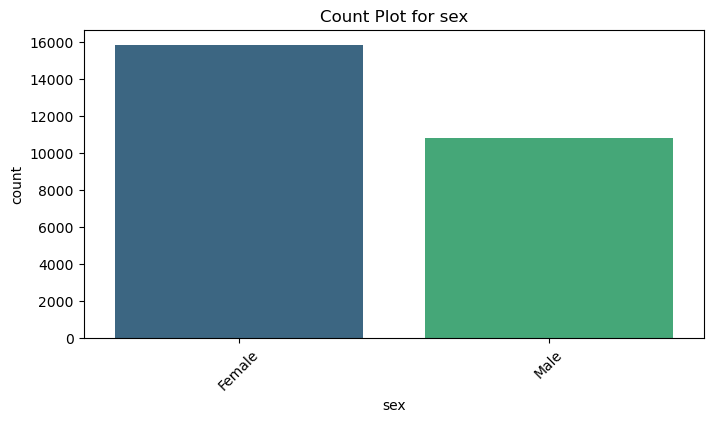

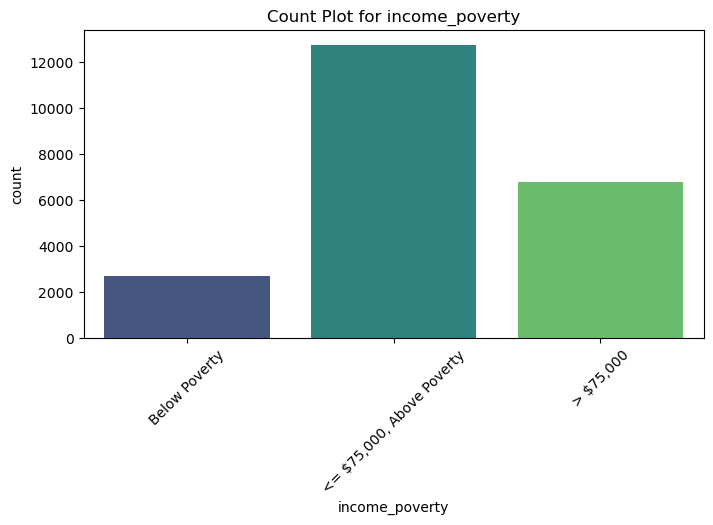

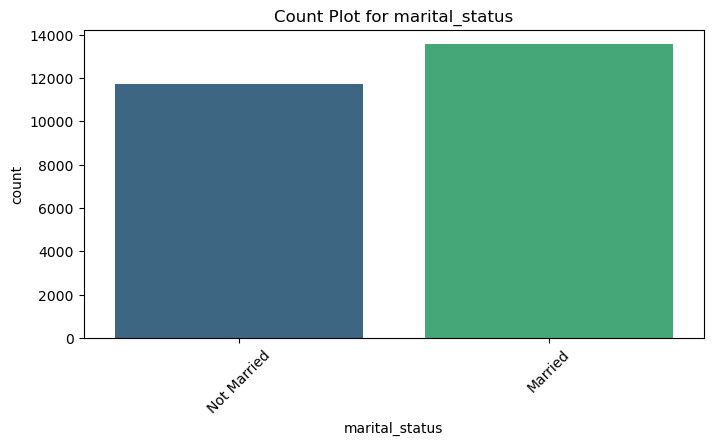

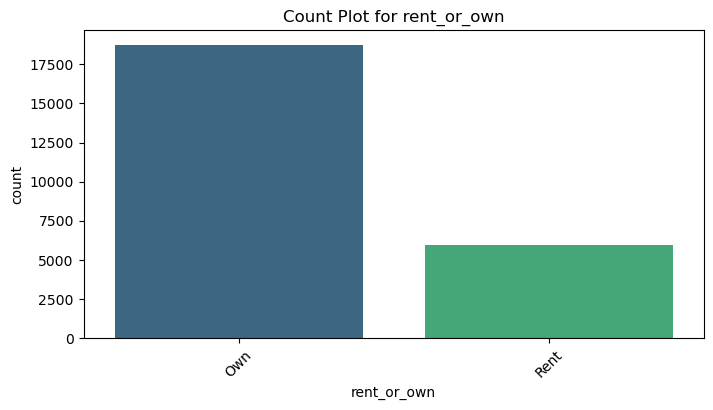

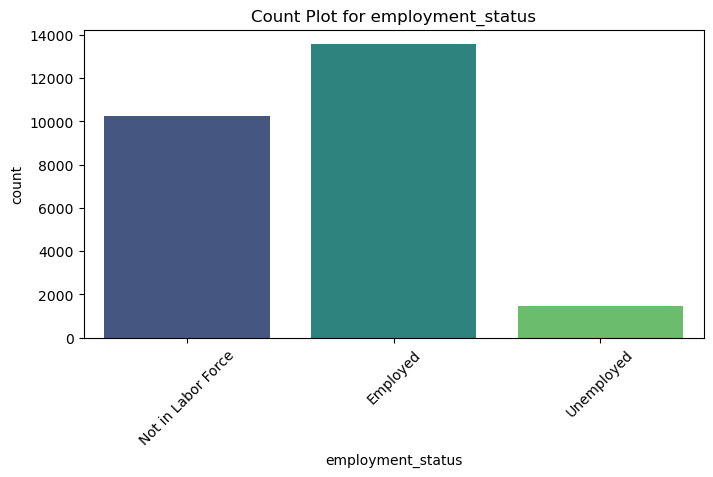

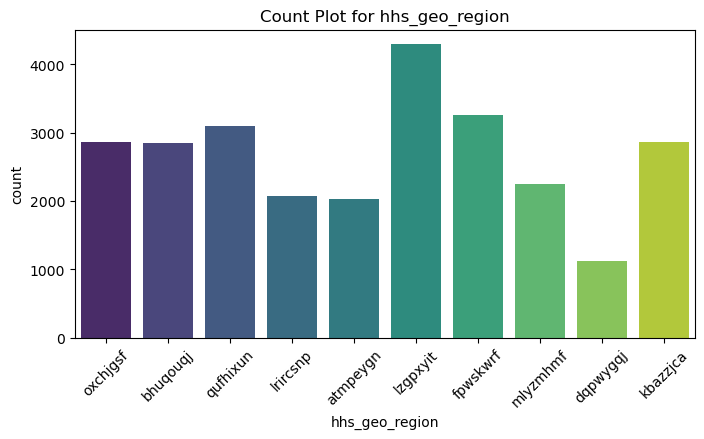

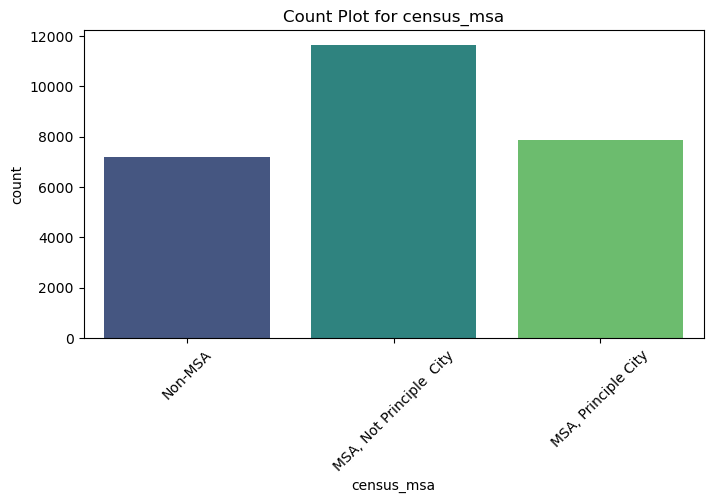

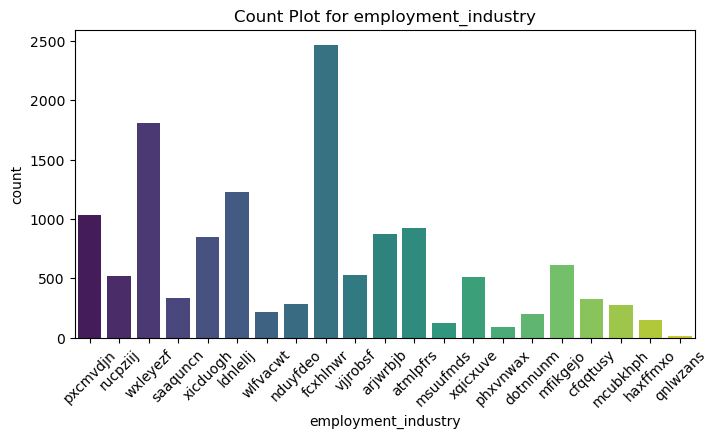

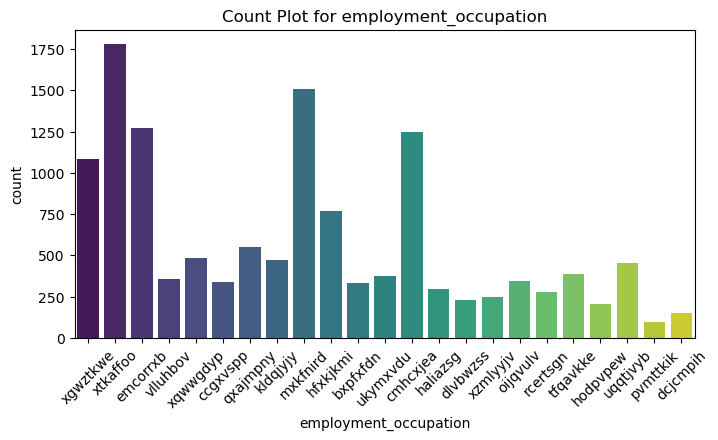

In [7]:
# Separate numerical and categorical columns
numerical_features = data1.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = data1.select_dtypes(exclude=[np.number]).columns.tolist()

plot_categorical_counts(data1,categorical_features)

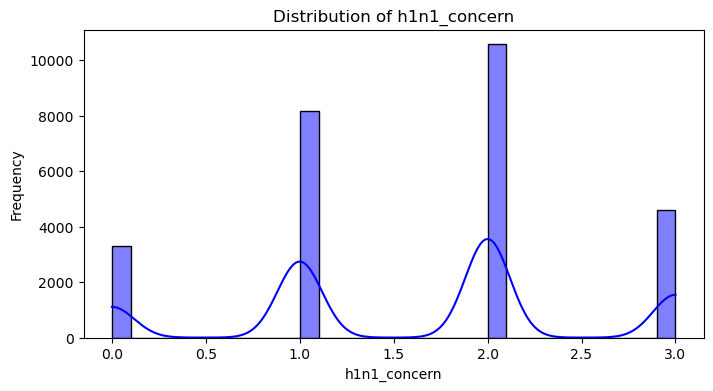

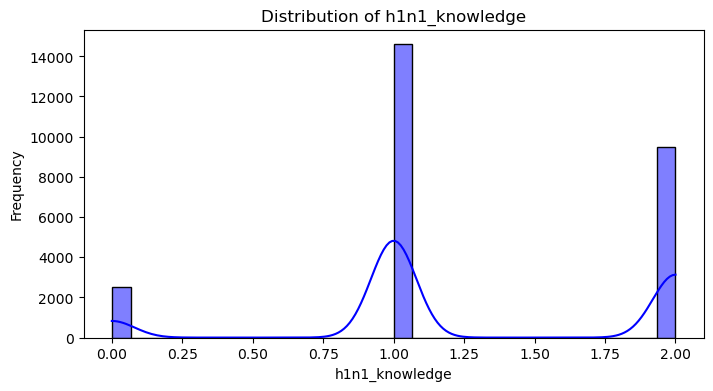

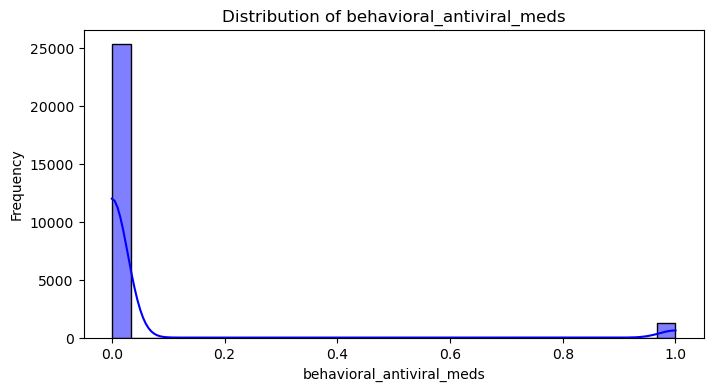

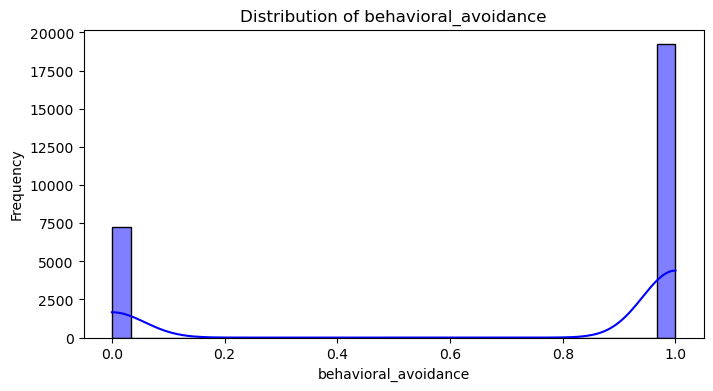

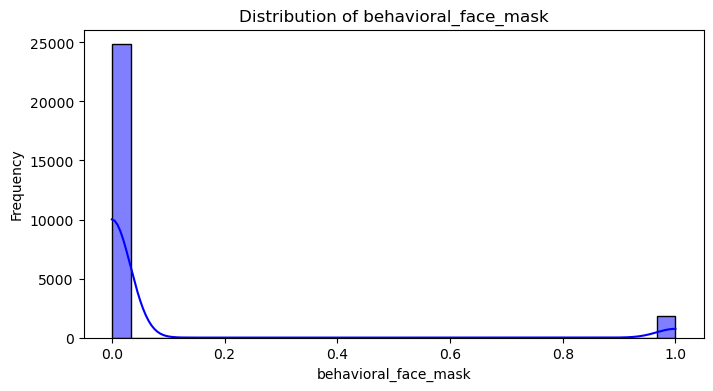

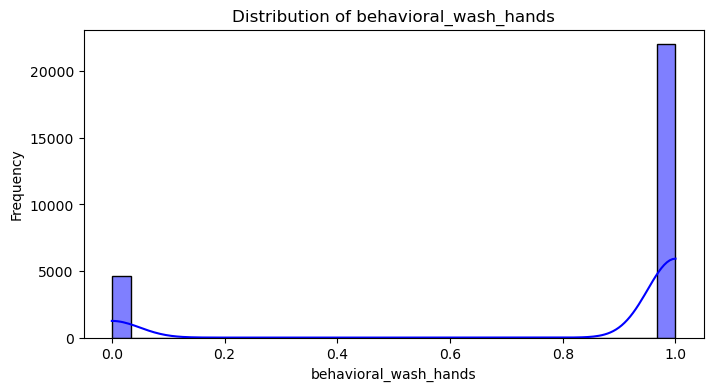

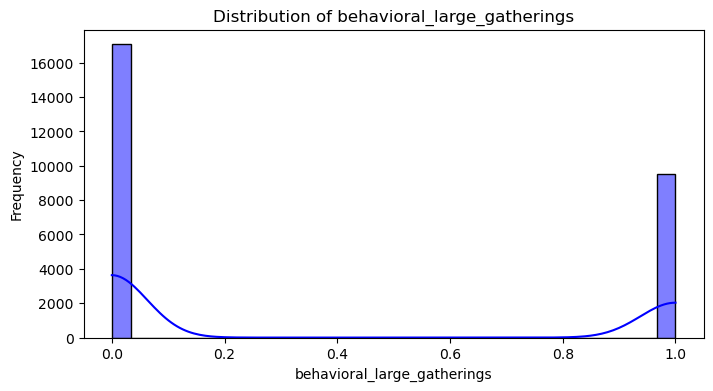

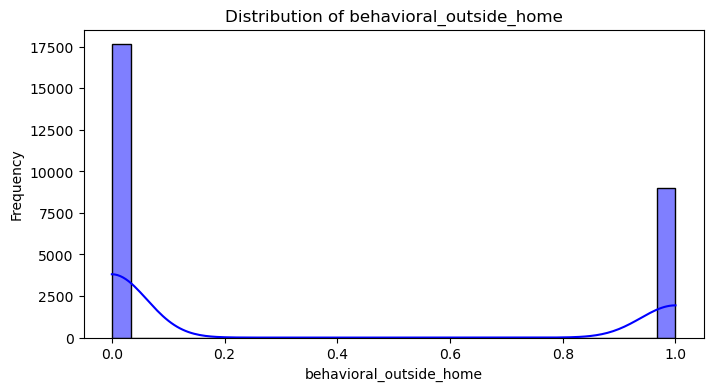

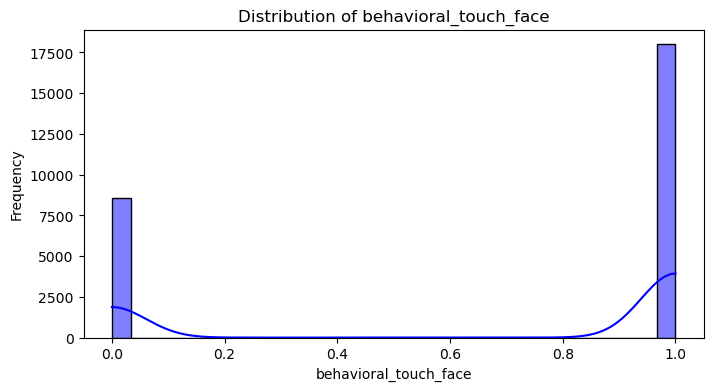

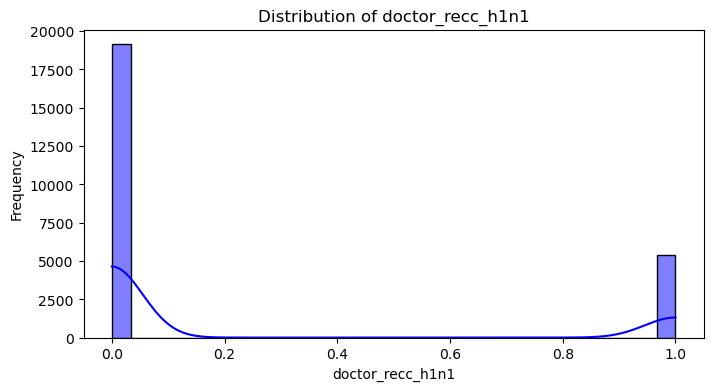

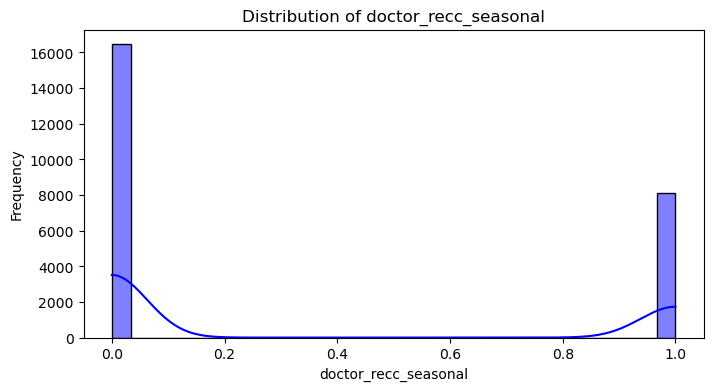

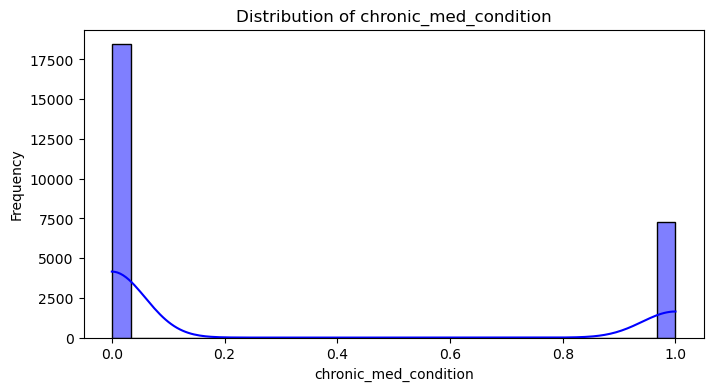

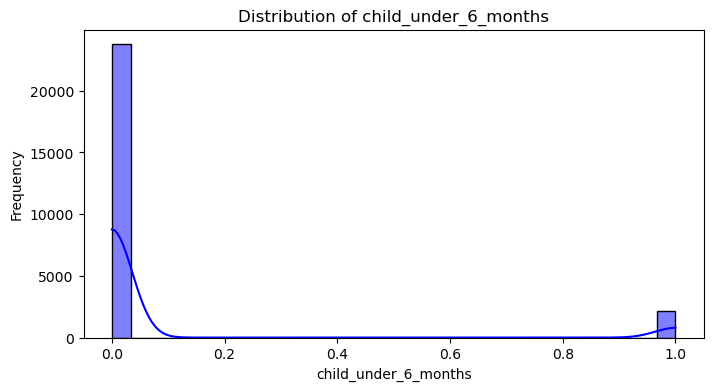

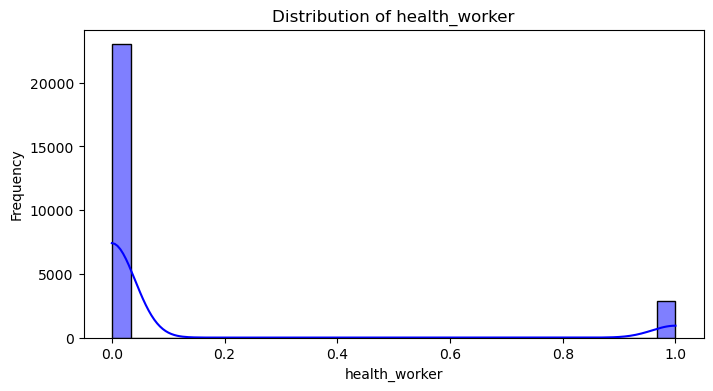

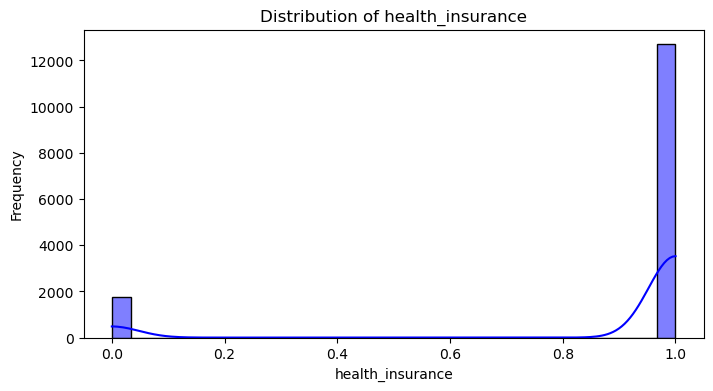

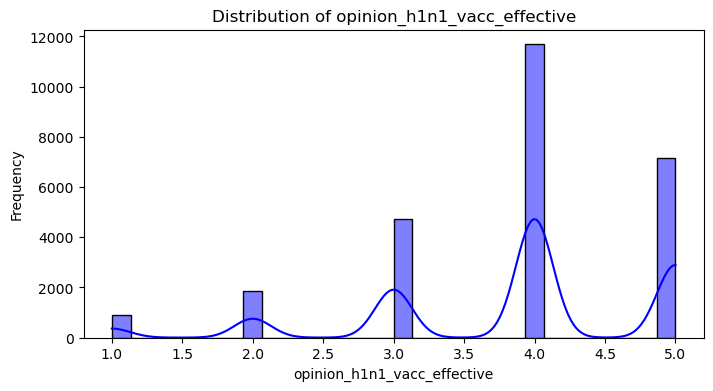

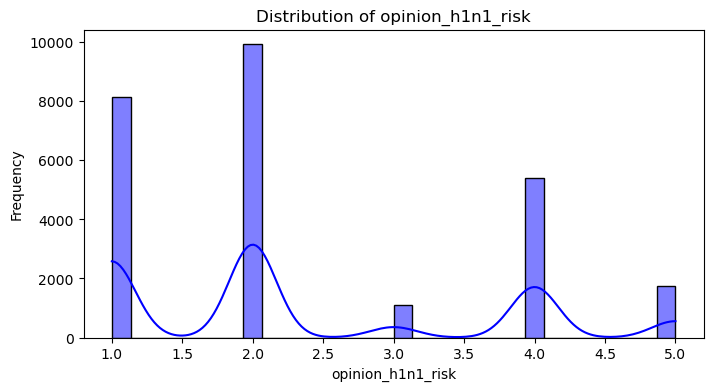

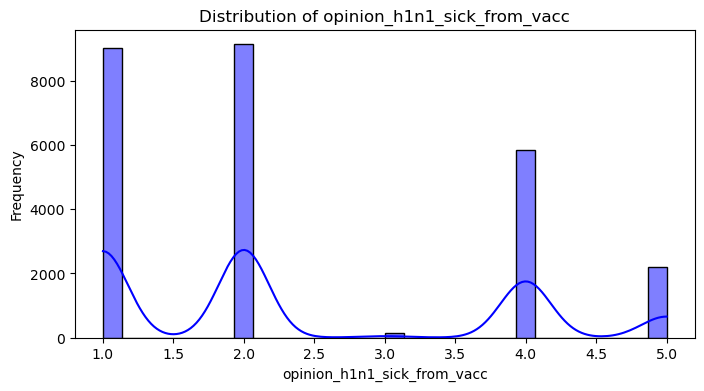

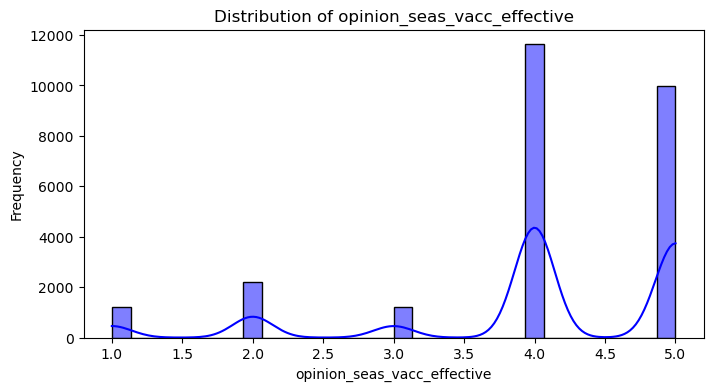

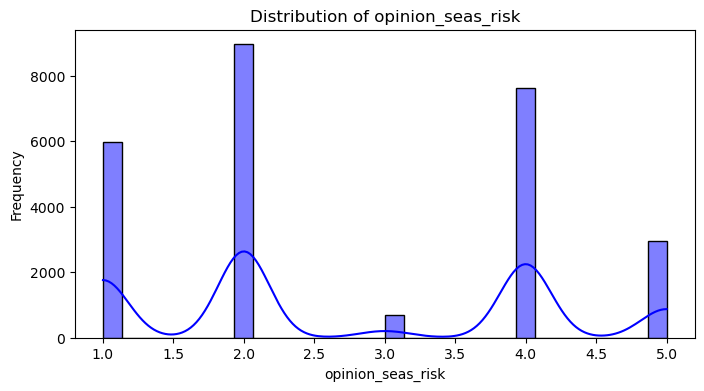

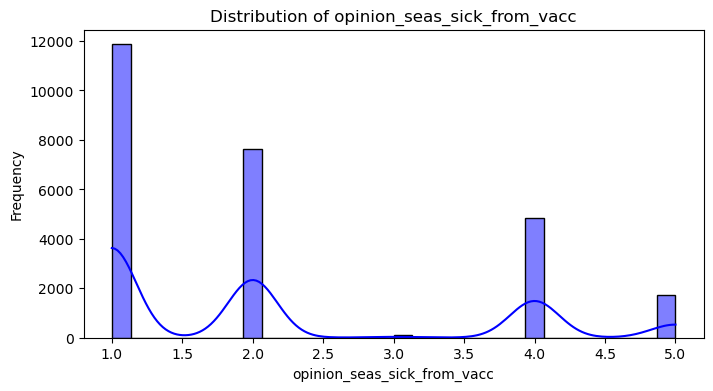

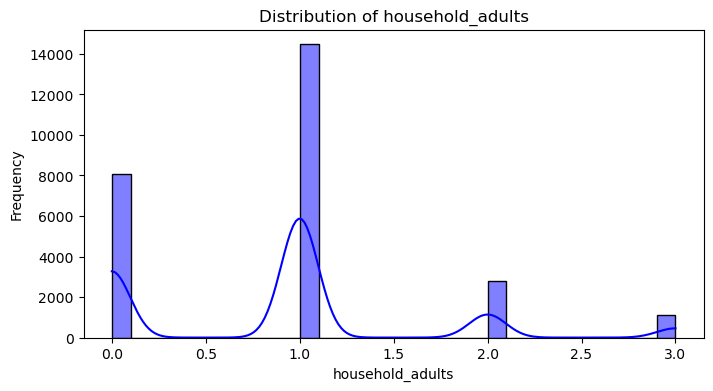

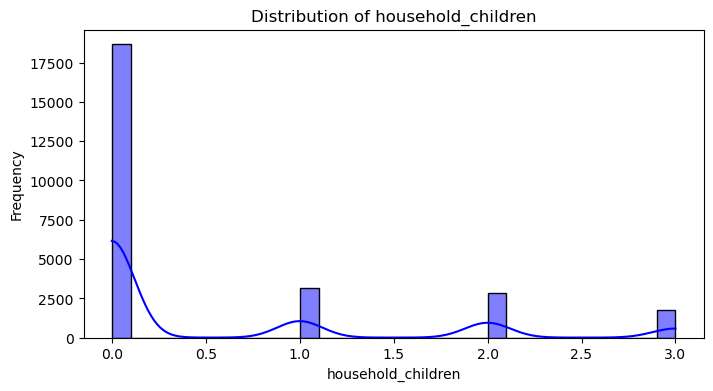

In [8]:
visualize_distributions(data1, numerical_features)

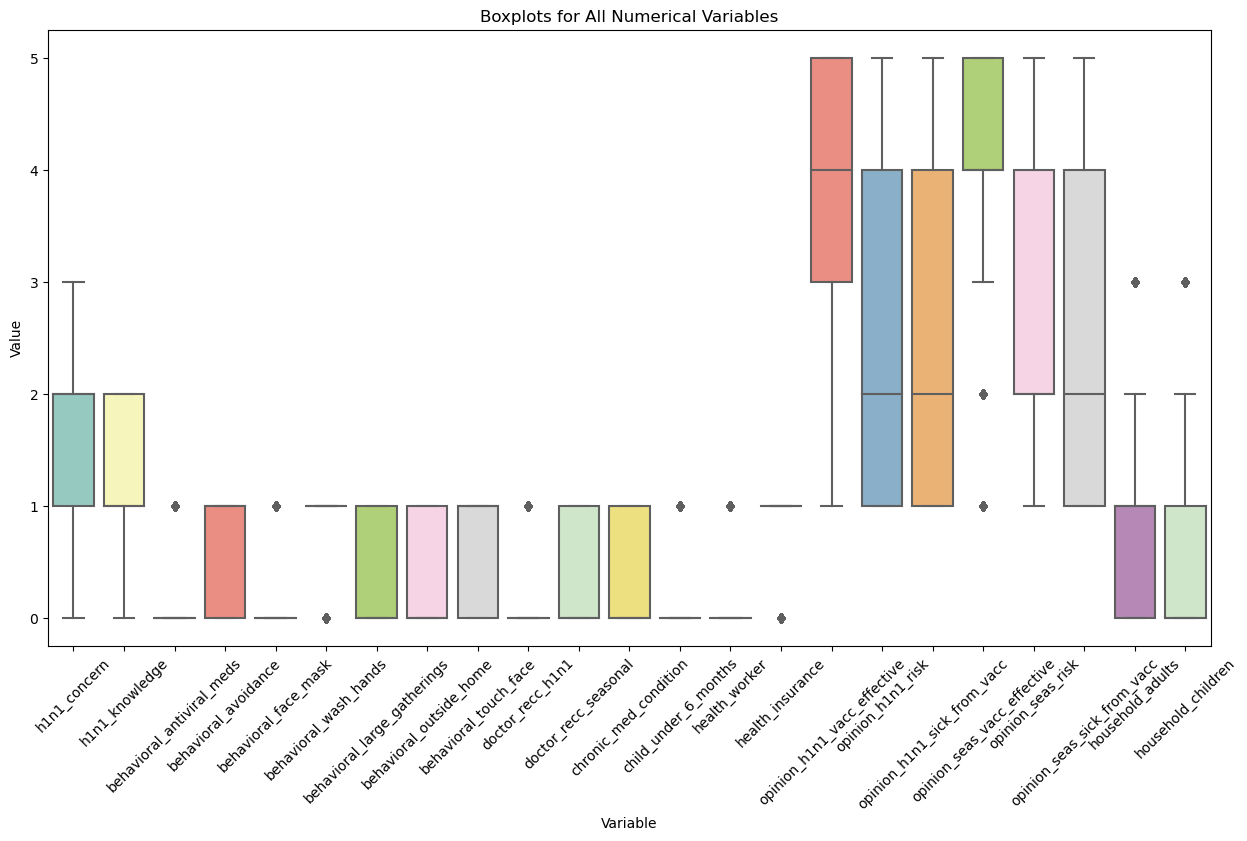

In [13]:
plot_multiple_boxplots(data1)

In [10]:
summary_statistics(data1)


Summary Statistics:
       h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count  26615.000000    26591.000000               26636.000000   
mean       1.618486        1.262532                   0.048844   
std        0.910311        0.618149                   0.215545   
min        0.000000        0.000000                   0.000000   
25%        1.000000        1.000000                   0.000000   
50%        2.000000        1.000000                   0.000000   
75%        2.000000        2.000000                   0.000000   
max        3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25% 

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


### Key methods to analyze feature-label relationships: 
 
#### Correlation Analysis: 
 
Pearson Correlation: Measures the linear relationship between two numerical features, providing a coefficient between -1 (strong negative correlation) and 1 (strong positive correlation). <br>
 
Spearman's Rank Correlation: Suitable for non-normally distributed data, analyzes the monotonic relationship between variables based on their ranks. 
 
#### Chi-Square Test: 
 
Used to assess the association between two categorical features, indicating whether there is a statistically significant relationship between the categories. 
 
#### Visualization Techniques: 
 
Scatterplots: Visually represent the relationship between two numerical variables, allowing you to identify patterns like linear trends, outliers, and clusters. <br>
 
Boxplots: Useful for comparing the distribution of a feature across different label categories. 

####  Machine Learning Feature Importance: 
 
Decision Trees: Provide feature importance scores based on how much each feature contributes to the decision-making process. 
 
Random Forests: Ensemble of decision trees, offering more robust feature importance estimations. 
 
 

In [5]:
# First we will calculated the correlation between each variable and the target variables
joined_df = data1.join(label_df)

# Calculate Pearson correlation for numerical features
numerical_corr1 = data1[numerical_features].corrwith(label_df['h1n1_vaccine'])
numerical_corr2 = data1[numerical_features].corrwith(label_df['seasonal_vaccine'])

# Function to calculate Point-biserial correlation for categorical features
def point_biserial_correlation(cat_col, target_col):
    # Convert categorical to numeric
    cat_encoded, _ = pd.factorize(cat_col)
    return pointbiserialr(cat_encoded, target_col)[0]

# Calculate Point-biserial correlation for categorical features with numerical target
categorical_corr1 = {col: point_biserial_correlation(data1[col], label_df['h1n1_vaccine']) for col in categorical_features}
categorical_corr2 = {col: point_biserial_correlation(data1[col], label_df['seasonal_vaccine']) for col in categorical_features}

print(numerical_corr1)

h1n1_concern                   0.121929
h1n1_knowledge                 0.117951
behavioral_antiviral_meds      0.040608
behavioral_avoidance           0.047690
behavioral_face_mask           0.070498
behavioral_wash_hands          0.074712
behavioral_large_gatherings    0.017822
behavioral_outside_home        0.021768
behavioral_touch_face          0.071648
doctor_recc_h1n1               0.393890
doctor_recc_seasonal           0.209864
chronic_med_condition          0.095207
child_under_6_months           0.066962
health_worker                  0.169768
health_insurance               0.121170
opinion_h1n1_vacc_effective    0.269347
opinion_h1n1_risk              0.323265
opinion_h1n1_sick_from_vacc    0.075091
opinion_seas_vacc_effective    0.179272
opinion_seas_risk              0.258571
opinion_seas_sick_from_vacc    0.008360
household_adults               0.007545
household_children            -0.003320
dtype: float64


In [8]:
numerical_corr3 = label_df['seasonal_vaccine'].corr(label_df['h1n1_vaccine'])
print(numerical_corr3)

0.377142653061445


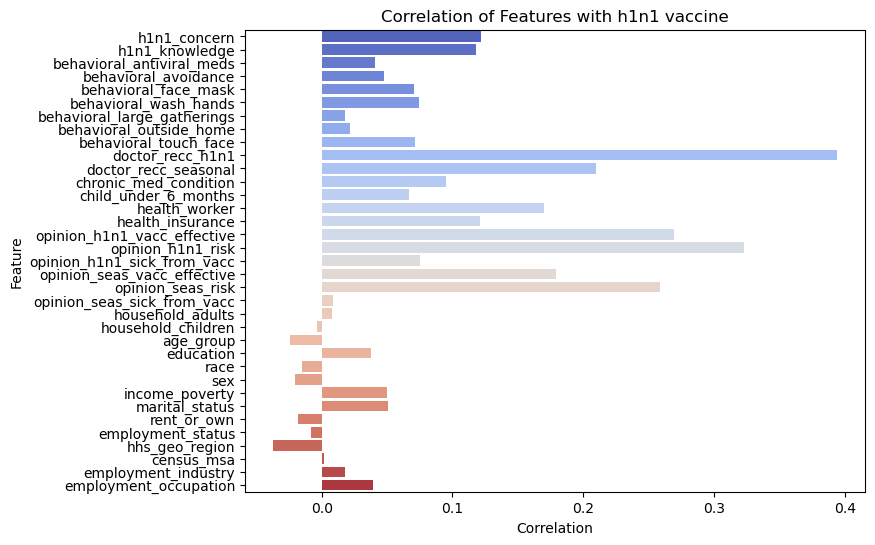

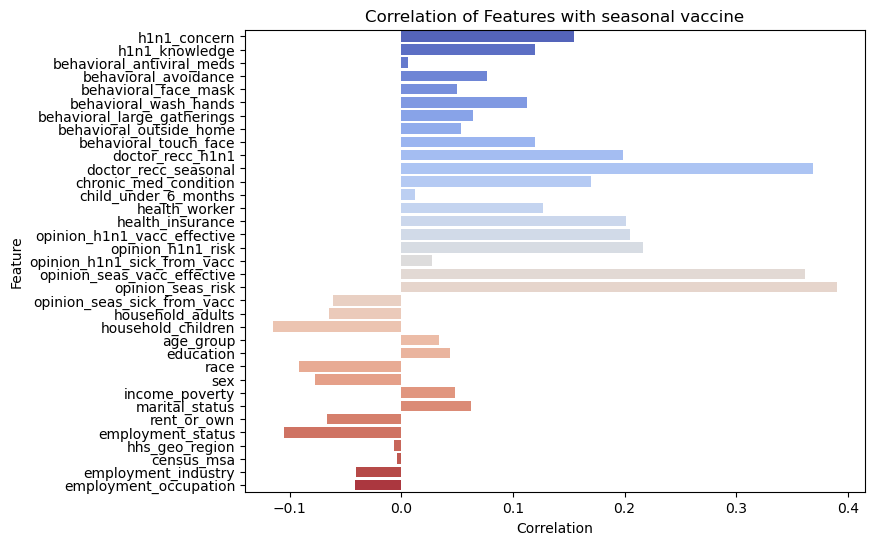

In [9]:
correlations = pd.concat([numerical_corr1, pd.Series(categorical_corr1)], axis=0)
# print(correlations)
correlations = correlations.rename('correlation').reset_index()
correlations.columns = ['Feature', 'Correlation']
# Visualization using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=correlations, x='Correlation', y='Feature', palette="coolwarm")
plt.title('Correlation of Features with h1n1 vaccine')
plt.show()

correlations2 = pd.concat([numerical_corr2, pd.Series(categorical_corr2)], axis=0)
correlations2 = correlations2.rename('correlation').reset_index()
correlations2.columns = ['Feature', 'Correlation']

plt.figure(figsize=(8, 6))
sns.barplot(data=correlations2, x='Correlation', y='Feature', palette="coolwarm")
plt.title('Correlation of Features with seasonal vaccine')
plt.show()



## Removing the irrelevant features 

In [10]:
# # The variables from the correlation graph that seems to be irreleavant should be removed 
# # Hence dropping these columns
columns_to_drop = ['census_msa']
data_x = data1.drop(columns=columns_to_drop,axis = 1)
# # data1.head()
# data_x = data1
# data_y = data1["Survived"]
# # data_x.head()
# # data_y.head()

data_test_x = data_test.drop(columns=columns_to_drop,axis = 1)
# # data1.head()
# data_test_y = pd.read_csv("gender_submission.csv",index_col='PassengerId')


## Filling the missing values
Here we will use the mean or mode method to fill the missing values.  
If the values are categorical then we use the mode.  
For the numerical values we use the median.  

In [11]:
# count_test = data_test.isna().sum()
# print(count)

# Using mean for the numerical column
columns_to_handle = numerical_features
data1[columns_to_handle] = data1[columns_to_handle].fillna(data1[columns_to_handle].mean())
data_test[columns_to_handle] = data_test[columns_to_handle].fillna(data_test[columns_to_handle].mean())

# Dataframe using mean of the columns 
# Using the mode for the categorical columns
columns_to_handle = categorical_features
# print (columns_to_handle)
data1[columns_to_handle] = data1[columns_to_handle].fillna(data1[columns_to_handle].mode().iloc[0])
data_test[columns_to_handle] = data_test[columns_to_handle].fillna(data_test[columns_to_handle].mode().iloc[0])

# # To ensure that we do not have any Nan values in a dataframe
count = data1.isna().sum()
count_test = data_test.isna().sum()
print(count_test)



h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

## Data splitting for training and validation

In [14]:
X_train, X_val, y_train, y_val = train_test_split(data1, label_df, test_size=0.2, random_state=42)

## Problem Statement 
we need to predict if the person would take the h1n1 or seasocnal vaccine based on some personal as well as behavioral information. Hence it is a classification problem.
We will use the  Supervised learning classification methods as below:  
1. Decision Trees
2. Logistic Regression
3. Random Forest

### 1. Decision Trees
for the decision trees we do not need to perfrom any scaling on the data.  
However we will need to do the encoding for categorical variables 

In [10]:
## Decision trees do not require scaling hence we only applied the label encoder for teh categorical features 

label_encoder = LabelEncoder()

for col in categorical_features:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_val[col] = label_encoder.fit_transform(X_val[col])
    data1[col] = label_encoder.fit_transform(data1[col])
    data_test[col] = label_encoder.fit_transform(data_test[col])

clf = DecisionTreeClassifier(random_state=0)
multi_target_dt = MultiOutputClassifier(clf, n_jobs=-1)
multi_target_dt.fit(X_train, y_train)

predictions = multi_target_dt.predict(X_val)
# print(predictions)

s1 = accuracy_score(y_val['h1n1_vaccine'], predictions[:, 0])
s2 = accuracy_score(y_val['seasonal_vaccine'], predictions[:, 1])
print(" Accuracy score:",s1,s2)

pred_prob = multi_target_dt.predict_proba(X_val)

y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": pred_prob[0][:, 1],
        "seasonal_vaccine": pred_prob[1][:, 1],
    },
    index = y_val.index
)

roc_auc_score(y_val, y_preds)


# cm = metrics.confusion_matrix(label_df, predictions)
# print(cm)

 Accuracy score: 0.7738674653687757 0.6827031074503931


0.6780378658237785

### 2. Logistic Regression

In [11]:
# Here we need to apply the standard scalar for teh features

logisticRegr = LogisticRegression(solver='liblinear')
multi_target_lr = MultiOutputClassifier(logisticRegr, n_jobs=-1)
multi_target_lr.fit(X_train, y_train)

predictions = multi_target_lr.predict(X_val)

s1 = accuracy_score(y_val['h1n1_vaccine'], predictions[:, 0])
s2 = accuracy_score(y_val['seasonal_vaccine'], predictions[:, 1])
print(" Accuracy score:",s1,s2)


pred_prob = multi_target_lr.predict_proba(X_val)

y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": pred_prob[0][:, 1],
        "seasonal_vaccine": pred_prob[1][:, 1],
    },
    index = y_val.index
)

roc_auc_score(y_val, y_preds)

 Accuracy score: 0.8399475851740921 0.7796705353800075


0.8409991219094695

### 3. Random Forest Classfier

In [27]:
rf = RandomForestClassifier(n_estimators=800,random_state=42)
multi_target_rf = MultiOutputClassifier(rf, n_jobs=-1)
multi_target_rf.fit(X_train, y_train)

predictions = multi_target_rf.predict(X_val)

s1 = accuracy_score(y_val['h1n1_vaccine'], predictions[:, 0])
s2 = accuracy_score(y_val['seasonal_vaccine'], predictions[:, 1])
print(" Accuracy score:",s1,s2)

pred_prob = multi_target_rf.predict_proba(X_val)

y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": pred_prob[0][:, 1],
        "seasonal_vaccine": pred_prob[1][:, 1],
    },
    index = y_val.index
)

roc_auc_score(y_val, y_preds)

 Accuracy score: 0.8534256832646949 0.7895919131411456


0.8640655031858405

### 4. XGB Classifier

In [13]:
xgb = XGBClassifier(eval_metric='mlogloss')
multi_target_xgb = MultiOutputClassifier(xgb, n_jobs=-1)
multi_target_xgb.fit(X_train, y_train)

predictions = multi_target_rf.predict(X_val)

s1 = accuracy_score(y_val['h1n1_vaccine'], predictions[:, 0])
s2 = accuracy_score(y_val['seasonal_vaccine'], predictions[:, 1])
print(" Accuracy score:",s1,s2)

pred_prob = multi_target_xgb.predict_proba(X_val)

y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": pred_prob[0][:, 1],
        "seasonal_vaccine": pred_prob[1][:, 1],
    },
    index = y_val.index
)

roc_auc_score(y_val, y_preds)

 Accuracy score: 0.8545488581055785 0.7882815424934482


0.8546662314419899

## Optimization

In [14]:
# we have seen that logistic regression and the Random forest classifier perfrom better hence we will optimize
# hyperparameters for both of these classfier

param_grid = {
    'estimator__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'estimator__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'estimator__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'estimator__min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=multi_target_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Predict using the best model found
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_val)

s1 = accuracy_score(y_val['h1n1_vaccine'], predictions[:, 0])
s2 = accuracy_score(y_val['seasonal_vaccine'], predictions[:, 1])
print(" Accuracy score:",s1,s2)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 10, 'estimator__n_estimators': 300}
 Accuracy score: 0.8517409210033695 0.7879071508798203


In [15]:
pred_prob = best_model.predict_proba(X_val)

y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": pred_prob[0][:, 1],
        "seasonal_vaccine": pred_prob[1][:, 1],
    },
    index = y_val.index
)

roc_auc_score(y_val, y_preds)

0.8643967646237951

## Final submission

In [28]:
# First we will train the best model on full data and then predict the testdata
multi_target_rf.fit(data1, label_df)
# best_model = grid_search.best_estimator_
predictions = multi_target_rf.predict(data_test)
pred_prob = multi_target_rf.predict_proba(data_test)

In [29]:
submission_data = pd.read_csv("submission_format.csv",index_col='respondent_id')
submission_data["h1n1_vaccine"] = pred_prob[0][:, 1]
submission_data["seasonal_vaccine"] = pred_prob[1][:, 1]
submission_data.to_csv('my_submission.csv', index=True)